In [1]:
import sys

sys.path.append('../../src/')

import numpy as np
import tensorflow as tf
from numpy import sin
from tensorflow import keras
from numpy import sin, exp
import os

from utils.utils import train_data, plot_results

%matplotlib inline

In [2]:
name = "exp(x)"
activation = 'relu'
batch_size = 128
neurons_number = 128
epochs = 25
optimize = 'Adam'
function_to_approximate = lambda x: exp(x)

In [3]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse', 'mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               256       
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 66,433
Trainable params: 66,433
Non-trainable params: 0
____________________________________________________

In [4]:
X_train, Y_train = train_data(start=0, end=0.8, number=1000000, f=function_to_approximate)
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/25
6250/6250 [==============================] - 6s 870us/step - loss: 0.0211 - mse: 0.0211 - mean_absolute_error: 0.0265 - val_loss: 7.6489e-04 - val_mse: 7.6489e-04 - val_mean_absolute_error: 0.0237
Epoch 2/25
6250/6250 [==============================] - 5s 862us/step - loss: 2.4266e-05 - mse: 2.4266e-05 - mean_absolute_error: 0.0029 - val_loss: 4.1458e-04 - val_mse: 4.1458e-04 - val_mean_absolute_error: 0.0166
Epoch 3/25
6250/6250 [==============================] - 5s 875us/step - loss: 1.5772e-05 - mse: 1.5772e-05 - mean_absolute_error: 0.0021 - val_loss: 3.1074e-04 - val_mse: 3.1074e-04 - val_mean_absolute_error: 0.0136
Epoch 4/25
6250/6250 [==============================] - 5s 869us/step - loss: 1.5686e-05 - mse: 1.5686e-05 - mean_absolute_error: 0.0022 - val_loss: 3.2075e-04 - val_mse: 3.2075e-04 - val_mean_absolute_error: 0.0144
Epoch 5/25
6250/6250 [==============================] - 5s 867us/step - loss: 1.1603e-05 - mse: 1.1603e-05 - mean_absolute_error: 0.0018 - val_l

In [5]:
X_test, Y_test = train_data(start=0, end=1.0, number=333, f=function_to_approximate)
loss, mse, mean_absolute_error = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 429us/step - loss: 3.7107e-04 - mse: 3.7107e-04 - mean_absolute_error: 0.0105


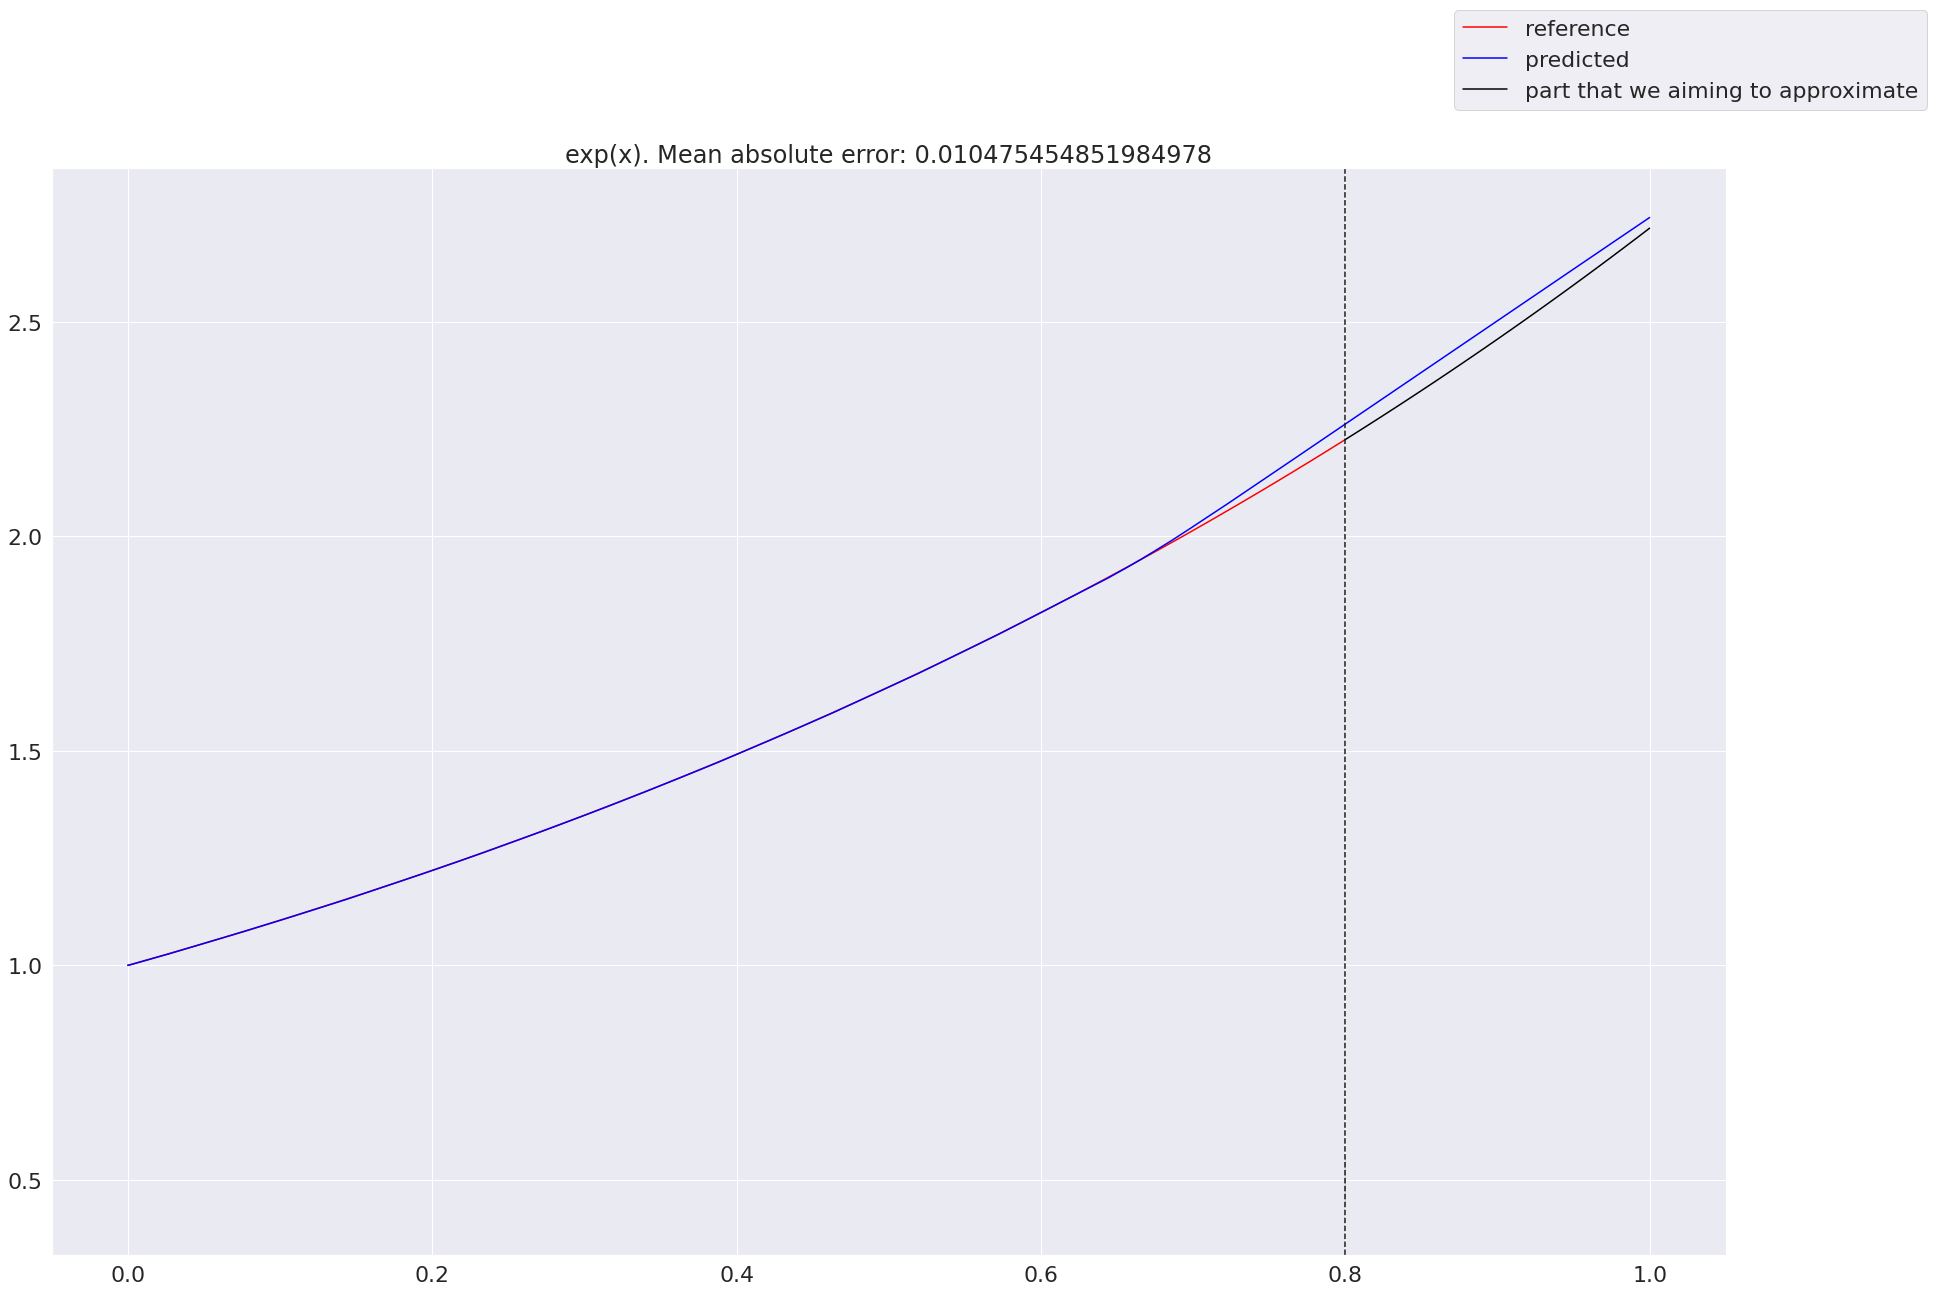

In [6]:
X_predicted = np.linspace(0, 1.0, 1500)
Y_predicted = model.predict(X_predicted).reshape((1500,))

plot_results(X_train, Y_train, X_predicted, Y_predicted, name, mean_absolute_error, 0.8, function_to_approximate)